## Observations and Insights

## Dependencies and starter code

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combine_pd = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

## Summary statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [61]:
mean = combine_pd.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = combine_pd.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = combine_pd.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = combine_pd.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = combine_pd.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

data = {
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_deviation,
    "SEM": sem
}

summary_table = pd.DataFrame(data)
summary_table

,Mean,Median,SEM,Standard Deviation,Variance
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,4.994774,24.947764
Ceftamin,52.591172,51.776157,0.469821,6.268188,39.290177
Infubinol,52.884795,51.820584,0.492236,6.567243,43.128684
Ketapril,55.235638,53.698743,0.603860,8.279709,68.553577
Naftisol,54.331565,52.509285,0.596466,8.134708,66.173479
Placebo,54.033581,52.288934,0.581331,7.821003,61.168083
Propriva,52.322552,50.854632,0.512884,6.507770,42.351070
Ramicane,40.216745,40.673236,0.320955,4.846308,23.486704
Stelasyn,54.233149,52.431737,0.573111,7.710419,59.450562


## Bar plots

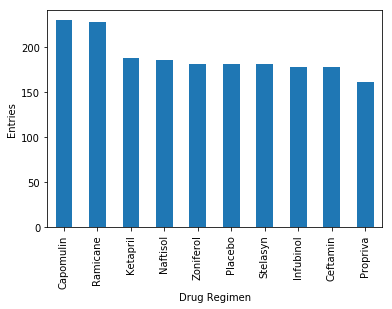

In [62]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

counts = combine_pd['Drug Regimen'].value_counts()
counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Entries")
plt.show()

## Pie plots

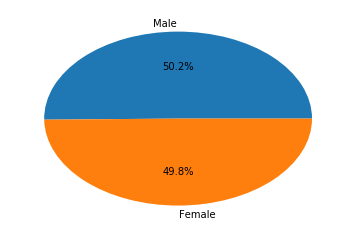

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

counts = mouse_metadata.Sex.value_counts()
plt.pie(counts.values,labels=["Male", "Female"],autopct='%1.1f%%')
plt.show()

## Quartiles, outliers and boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

by_mouse = combine_pd.groupby(["Mouse ID"]).max()
by_mouse_reset = by_mouse.reset_index()

merged_data = by_mouse_reset[['Mouse ID','Timepoint']].\
    merge(combine_pd,on=['Mouse ID','Timepoint'],how="left")

def get_outliers(regimen):
    regimen_data = merged_data.loc[merged_data["Drug Regimen"] == regimen]['Tumor Volume (mm3)']
    
    quartiles = regimen_data.quantile([.25,.5,.75])
    quart_first = quartiles[0.25]
    quart_last = quartiles[0.75]
    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 * quart_range)
    upper_bound = quart_last + (1.5 * quart_range)

    outliers = regimen_data.loc[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    print(outliers)
    return regimen_data
    
cap = get_outliers("Capomulin")
ram = get_outliers("Ramicane")
inf = get_outliers("Infubinol")
ceft = get_outliers("Ceftamin")



Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


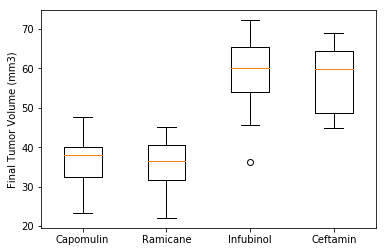

In [65]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([cap, ram, inf, ceft],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and scatter plots

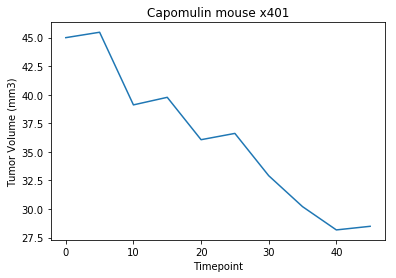

In [66]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
def get_line_plot(regimen, mouse_id):
    regimen_data = combine_pd.loc[combine_pd["Drug Regimen"] == regimen]
    data_by_id = regimen_data.loc[regimen_data['Mouse ID'] == mouse_id]
    plt.plot(data_by_id['Timepoint'], data_by_id['Tumor Volume (mm3)'])
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.title(regimen + " mouse " + mouse_id)
    plt.show()
    
get_line_plot("Capomulin", "x401")

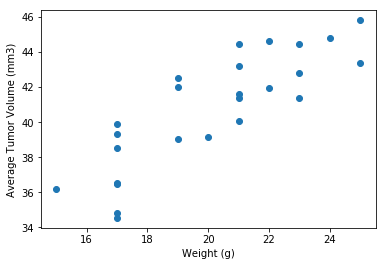

In [67]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
def generate_scatter_plot(regimen):
    regimen_data = combine_pd.loc[combine_pd['Drug Regimen'] == regimen]
    averages = regimen_data.groupby(['Mouse ID']).mean()
    plt.scatter(averages['Weight (g)'], averages['Tumor Volume (mm3)'])
    plt.xlabel('Weight (g)')
    plt.ylabel('Average Tumor Volume (mm3)')
    plt.show()
    return averages
cap_averages = generate_scatter_plot("Capomulin")

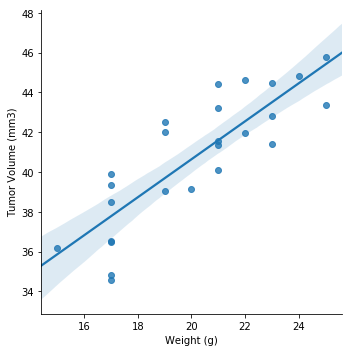

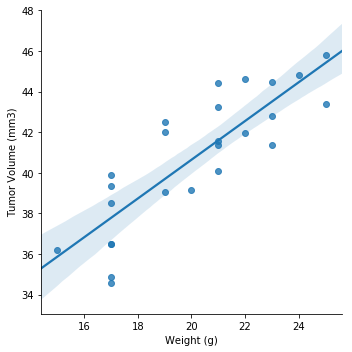

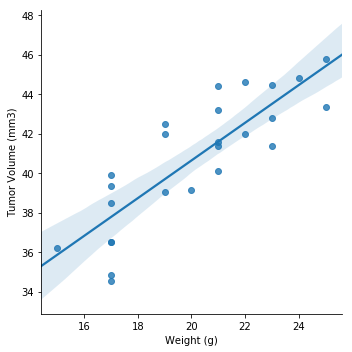

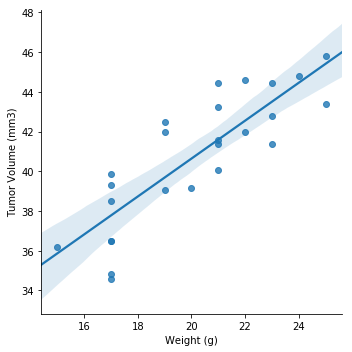

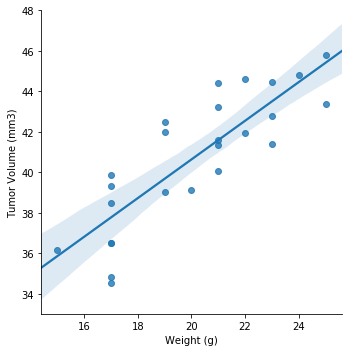

In [76]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

coefficient = sns.lmplot(x='Weight (g)',y='Tumor Volume (mm3)', data=cap_averages, fit_reg=True)
plt.show()